In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/panicpotatoe/dataset/master/salary_data.csv')
df.sample(5)

,YearsExperience,Salary
17,5.3,83088
11,4.0,55794
19,6.0,93940
20,6.8,91738
18,5.9,81363


#### Câu 1

In [3]:
# 1A
# Year
df_year_min = np.min(df['YearsExperience'])
df_year_max = np.max(df['YearsExperience'])
df_year_mean = np.mean(df['YearsExperience'])
df_year_med = np.median(df['YearsExperience'])

print(f"{df_year_min=}")
print(f"{df_year_max=}")
print(f"{df_year_mean=}")
print(f"{df_year_med=}")

df_year_min=1.1
df_year_max=10.5
df_year_mean=5.3133333333333335
df_year_med=4.7


In [4]:
# 1A
# Salary
df_salary_min = np.min(df['Salary'])
df_salary_max = np.max(df['Salary'])
df_salary_mean = np.mean(df['Salary'])
df_salary_med = np.median(df['Salary'])

print(f"{df_salary_min=}")
print(f"{df_salary_max=}")
print(f"{df_salary_mean=}")
print(f"{df_salary_med=}")

df_salary_min=37731
df_salary_max=122391
df_salary_mean=76003.0
df_salary_med=65237.0


In [5]:
# 1A
# Salary
salary_Q1, salary_Q2, salary_Q3 = df['Salary'].quantile([.25, .50, .75])

print(f"{salary_Q1=}")
print(f"{salary_Q2=}")
print(f"{salary_Q3=}")

salary_Q1=56720.75
salary_Q2=65237.0
salary_Q3=100544.75


YearsExperience       Axes(0.125,0.11;0.352273x0.77)
Salary             Axes(0.547727,0.11;0.352273x0.77)
dtype: object

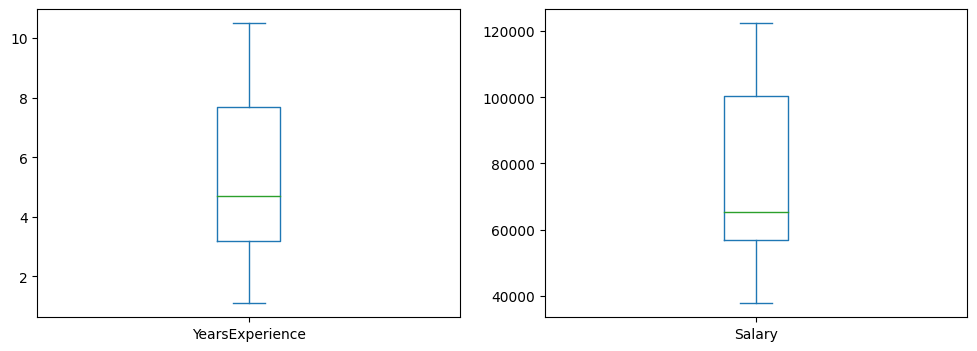

In [6]:
# 1A
# Chart
df.plot.box(subplots=True, figsize=(12, 4), layout=(1, 2))

In [7]:
# 1B
# Variance Year

variance_year_numerator = 0
[
    variance_year_numerator := variance_year_numerator + (year - df_year_mean) ** 2
    for year in df["YearsExperience"]
]
variance_year = variance_year_numerator / (len(df["YearsExperience"]))
print(f"{variance_year=}")

variance_year=7.785155555555554


In [8]:
# 1B
# Variance Salary

variance_salary_numerator = 0
[
    variance_salary_numerator := variance_salary_numerator
    + (salary - df_salary_mean) ** 2
    for salary in df["Salary"]
]
variance_salary = variance_salary_numerator / (len(df["Salary"]))
print(f"{variance_salary=}")

variance_salary=726499261.7333333


In [9]:
# 1B Start
# Standard Deviation
std_dev_year = np.sqrt(variance_year)
std_dev_salary = np.sqrt(variance_salary)

print(f"{std_dev_year=}")
print(f"{std_dev_salary=}")

std_dev_year=2.790189161249745
std_dev_salary=26953.65024877583


#### Câu 2

In [10]:
# 2A
df['zYear'] = (df.loc[:, 'YearsExperience'] - df_year_mean)/std_dev_year
df['zSalary'] = (df.loc[:, 'Salary'] - df_salary_mean)/std_dev_salary

df_zYear_mean = np.mean(df['zYear'])
df_zSalary_mean = np.mean(df['zSalary'])
std_zYear = np.std(df['zYear'])
std_zSalary = np.std(df['zSalary'])

df

,YearsExperience,Salary,zYear,zSalary
0,1.1,39343,-1.510053,-1.360113
1,1.3,46205,-1.438373,-1.105527
2,1.5,37731,-1.366693,-1.419919
3,2.0,43525,-1.187494,-1.204957
4,2.2,39891,-1.115814,-1.339781
5,2.9,56642,-0.864935,-0.718307
6,3.0,60150,-0.829096,-0.588158
7,3.2,54445,-0.757416,-0.799817
8,3.2,64445,-0.757416,-0.428810
9,3.7,57189,-0.578216,-0.698013


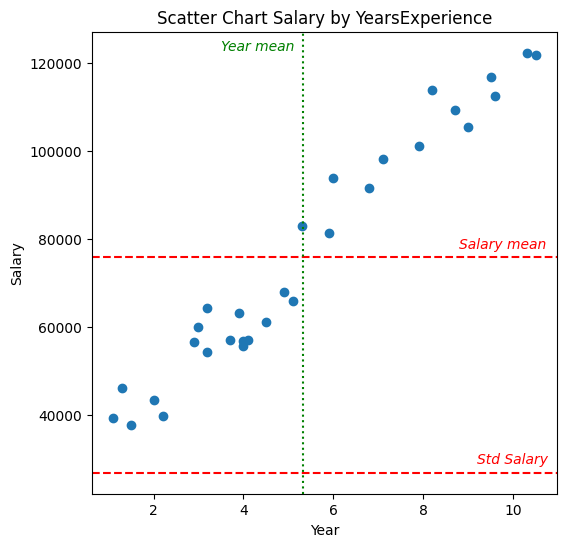

In [11]:
# 2B
# Root DB
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title('Scatter Chart Salary by YearsExperience')
ax.set_xlabel('Year')
ax.set_ylabel('Salary')

ax.text(9.2, 2.9e4, 'Std Salary', style='italic', color='r')
plt.axhline(std_dev_salary, linestyle='dashed', color='r')

ax.text(8.8, 7.8e4, 'Salary mean', style='italic', color='r')
plt.axhline(df_salary_mean, linestyle='dashed', color='r')

ax.text(3.5, 12.3e4, 'Year mean', style='italic', color='g')
plt.axvline(df_year_mean, linestyle='dotted', color='g')

plt.scatter(data=df, x="YearsExperience", y="Salary")
plt.show()

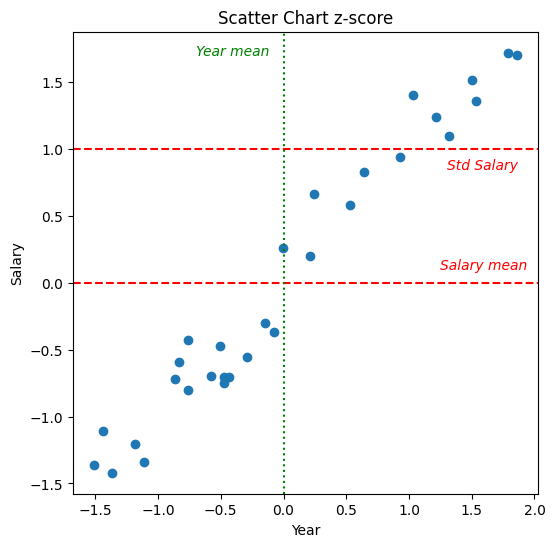

In [12]:
# 2B
# Root DB
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title('Scatter Chart z-score')
ax.set_xlabel('Year')
ax.set_ylabel('Salary')

ax.text(1.3, 0.85, 'Std Salary', style='italic', color='r')
plt.axhline(std_zSalary, linestyle='dashed', color='r')

ax.text(1.25, 0.1, 'Salary mean', style='italic', color='r')
plt.axhline(df_zSalary_mean, linestyle='dashed', color='r')

ax.text(-0.7, 1.7, 'Year mean', style='italic', color='g')
plt.axvline(df_zYear_mean, linestyle='dotted', color='g')

plt.scatter(data=df, x="zYear", y="zSalary")
plt.show()

#### Câu 3

In [13]:
# Correlation
df_correlation = np.corrcoef(df["YearsExperience"], df["Salary"])[0, 1]
df_correlation

0.9782416184887599

In [14]:
1 - df_correlation

0.0217583815112401

Nhận xét:
- Số sấp sỉ 1, lệch 2,18%. Đồng nghĩa với việc kinh nghiệm của tỉ lệ thuận với tiền lương của một nhân viên.
- Theo biểu đồ số năm kinh nghiệm ít thì tiền lương có thể xa với độ lệch chuẩn nhưng số năm kinh nghiệm càng lớn thì con số sẽ càng nhỏ

#### Câu 4

In [15]:
# 4A
df_weight = df_correlation * (std_dev_salary / std_dev_year)
df_weight

df_zweight = df_correlation * (std_zYear / std_zSalary)
df_zweight

0.9782416184887601

In [16]:
# 4B
bias = std_dev_salary / (std_dev_year * df_weight)
bias

biasz = std_zSalary / (std_zYear * df_zweight)
biasz

1.0222423388046538

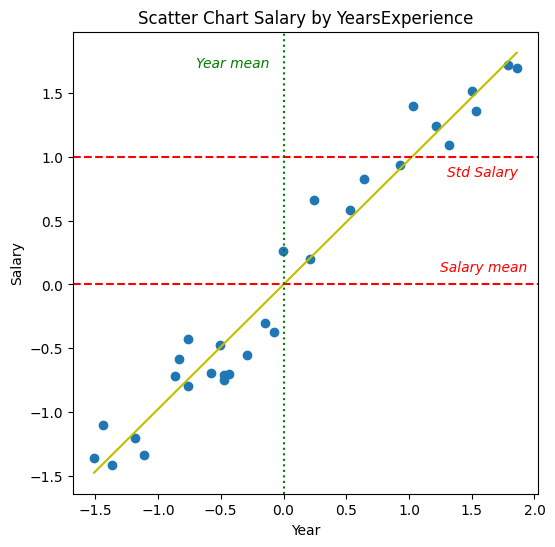

In [17]:
# 4C
df["xPos"] = df["zYear"]
df["yPos"] = df_zweight * df.loc[:, "zYear"]
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title("Scatter Chart Salary by YearsExperience")
ax.set_xlabel("Year")
ax.set_ylabel("Salary")

plt.plot(
    df["xPos"],
    df["yPos"],
    color='y'
)

ax.text(1.3, 0.85, 'Std Salary', style='italic', color='r')
plt.axhline(std_zSalary, linestyle='dashed', color='r')

ax.text(1.25, 0.1, 'Salary mean', style='italic', color='r')
plt.axhline(df_zSalary_mean, linestyle='dashed', color='r')

ax.text(-0.7, 1.7, 'Year mean', style='italic', color='g')
plt.axvline(df_zYear_mean, linestyle='dotted', color='g')

plt.scatter(data=df, x="zYear", y="zSalary")
plt.show()

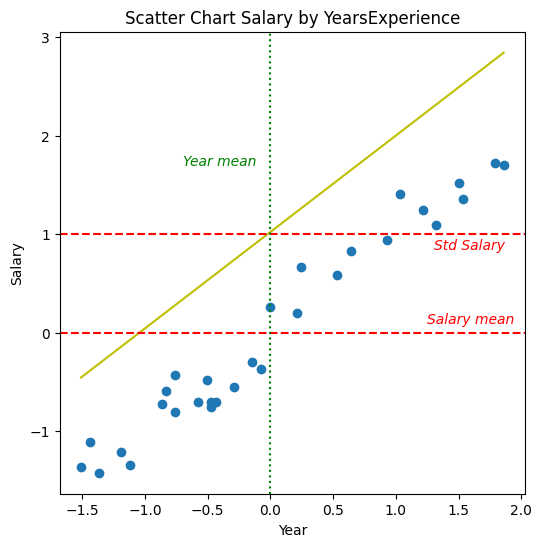

In [18]:
# 4C

df["xPos"] = df["zYear"]
df["yPos"] = df_zweight * df.loc[:, "zYear"] + biasz
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title("Scatter Chart Salary by YearsExperience")
ax.set_xlabel("Year")
ax.set_ylabel("Salary")

plt.plot(
    df["xPos"],
    df["yPos"],
    color='y'
)

ax.text(1.3, 0.85, 'Std Salary', style='italic', color='r')
plt.axhline(std_zSalary, linestyle='dashed', color='r')

ax.text(1.25, 0.1, 'Salary mean', style='italic', color='r')
plt.axhline(df_zSalary_mean, linestyle='dashed', color='r')

ax.text(-0.7, 1.7, 'Year mean', style='italic', color='g')
plt.axvline(df_zYear_mean, linestyle='dotted', color='g')

plt.scatter(data=df, x="zYear", y="zSalary")
plt.show()